# A Complete Guide to Building a Marketing Mix Model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Stage 1: Data Collection and Exploration

### Stage 1a: Data Collection

In [45]:
df=pd.read_csv(r'C:\Users\charl\OneDrive\Desktop\nick notes 2024\data\advertising.csv',sep =',')

In [46]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Stage 2a: Perform some EDA (Exploratory Data Analysis)
- Correlation Matrix
- Pairs Plot
- Feature importance 

Correlation Matrix:
correlation matrix is a table that shows the correlation values for each pair-relationship

<Axes: >

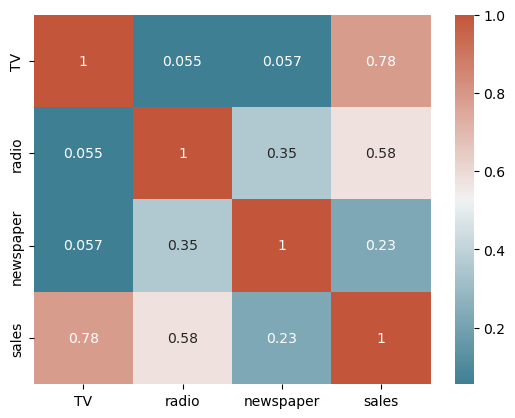

In [47]:
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, 
            annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True))

The correlation matrix above shows that there’s a strong correlation between TV and sales (0.78), a moderate correlation between radio and sales (0.58), and a weak correlation between newspaper and sales (0.23). It’s still too early to conclude anything but this is good to keep into consideration moving forward.

Pair plot:
A pair plot is a simple way to visualize the relationships between each variable 

C:\Users\charl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


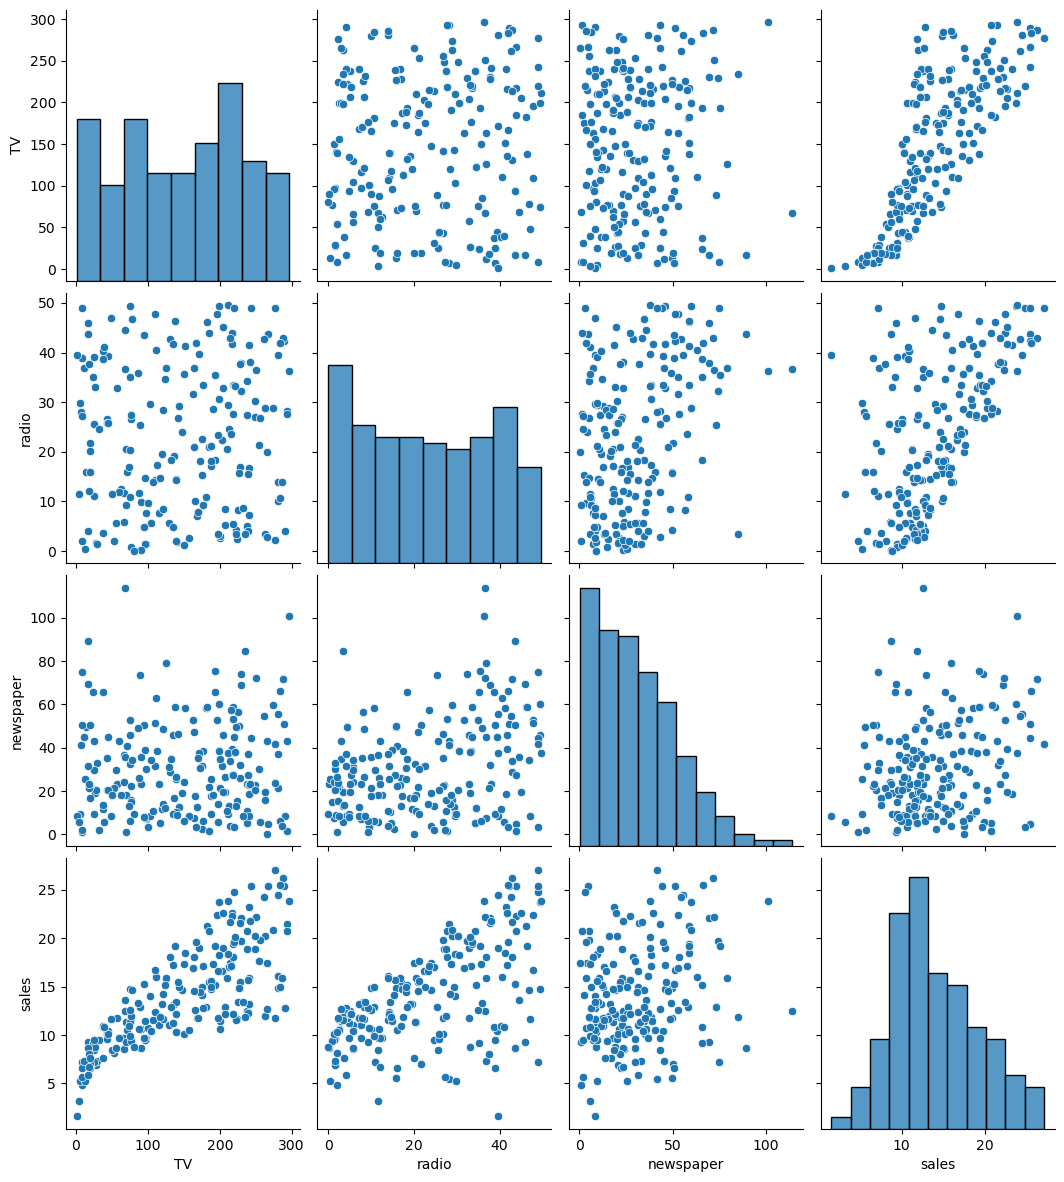

In [48]:
sns.pairplot(df, height=3 ,aspect=.9)

We can see some consistency between our pair plot and our original correlation matrix. It looks like there’s a strong positive relationship between TV and sales, less for radio, and even less for newspapers.

Feature importance 
allows you to determine how “important” each input variable is to predict the output variable. A feature is important if shuffling its values increases model error because this means the model relied on the feature for the prediction.

The code above is first creating a random forest model with sales as the target variable and the marketing channels as the feature inputs. Once the model is created, we then calculate the feature importance of each predictor and plot it on a bar chart.

<Axes: >

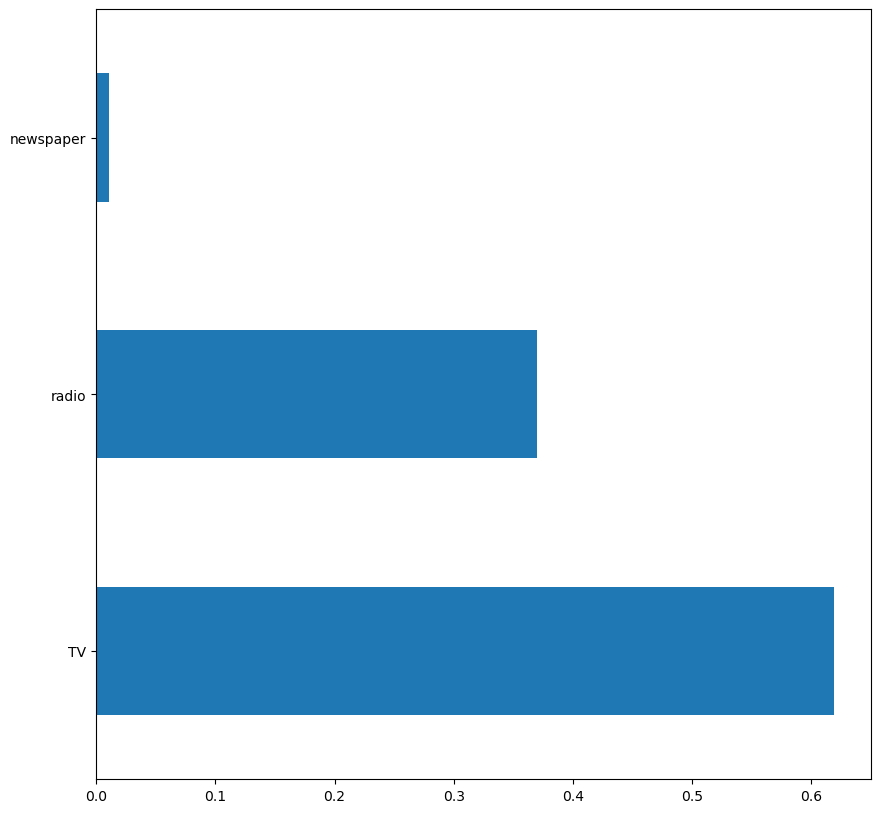

In [49]:
# Setting X and y variables
X = df.loc[:, df.columns != 'sales']
y = df['sales']# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

There seems to be a pattern, where TV is the most important, followed by radio, leaving newspaper last. Next comes actually building the model.

### Stage 3: Data Transformation

#### Stage 4: Build the Model

Step 4a: Build the model

the model we’re building is an OLS model, short for ordinary least squares, which is a method used to estimate the parameters in a linear regression model. 

The code above creates our ordinary least squares regression model, which specifies that we’re predicting sales based on TV, radio, and newspaper marketing dollars.

In [50]:
import statsmodels.formula.api as sm
model = sm.ols(formula="sales~TV+radio+newspaper", data=df).fit()

Step 4b: Analzye results

In [51]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           1.58e-96
Time:                        08:54:23   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

The Adj. R-squared is 0.896. This means that approximately 90% of the total variation in the data can be explained by the model. This also means that the model doesn’t account for 10% of the data used — this could be due to missing variables, for example if there was another marketing channel that wasn’t included, or simply due to noise in the data.
At the top half, you can see Prob (F-statistic): 1.58e-96. This probability value (p-value) represents the likelihood that there are no good predictors of the target variable — in this case, there are no good predictors of sales. Since the p-value is close to zero, we know that there is at least one predictor in the model that is a good predictor of sales.

If you look at the column, P>|t|, you can see the p-values for each predictor. The p-values for TV and radio are less than 0.000, but the p-value for newspapers is 0.86, which indicates that newspaper spend has no significant impact on sales. Generally, you want the p-value to be less than 1% or 5%, which are the two standards in practice.

Step 4c: Plot Actual vs Predicted Values
graph the predicted sales values with the actual sales values to visually see how our model performs. This is a particularly useful thing to do in a business use case if you’re trying to see how well your model reflects what’s actually happening 

 It seems like this model does a good job of predicting sales given TV, radio, and newspaper spend.
 


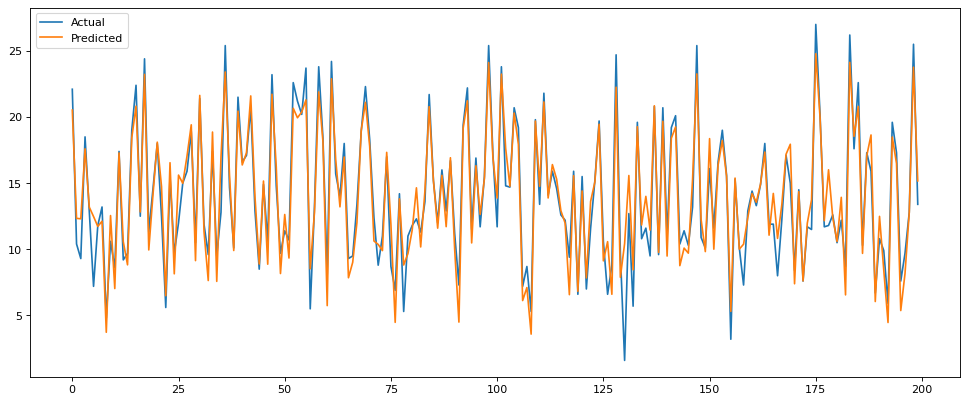

In [15]:
from matplotlib.pyplot import figure
y_pred = model.predict()
labels = df['sales']
df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp.head()
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()

Summarize model